<a href="https://colab.research.google.com/github/victorviro/ML_algorithms_python/blob/master/Introduction_generalized_linear_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Generalized Linear Models (GLM)

We will use a dataset that contains data about houses for practice purposes. We will try to predict the house prices using different linear regression models (the data used and the info of the task can be seen [here](https://github.com/victorviro/House-price-prediction-python)). Finally, we will see the logistic regression model for classification problems.


* **3. Data preparation**
    * 3.1 Dummy variables
    * 3.2 Split dataset
    
    
* **4. Generalized Linear Models**
    * 4.1 Introduction
    * 4.2 Linear regression
    * 4.3 Polynomial regression
    * 4.4 Regularized linear models 
    * 4.5 Robustness regression 
    * 4.6 Stochastic Gradient Descent
    * 4.7 Logistic regression

We import required libraries.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV, \
                                 SGDRegressor, HuberRegressor, LogisticRegression

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

In [0]:
from google.colab import drive
drive.mount('/content/drive')

## Read data processed 

In [3]:
data = pd.read_csv('/content/drive/My Drive/datasets/dataset.csv')
data.shape

(1456, 80)

In [4]:
data.head(4)

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,60,RL,65.0,8450,Pave,None,3,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,2,196.0,4,3,PConc,4,3,1,6,706.0,1,0.0,150.0,856.0,GasA,5,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,4,8,7,0,0,Attchd,2003.0,2,2.0,548.0,3,3,Y,0,61,0,0,0,0,0,None,None,0,2,2008,WD,Normal,12.247699
1,1,20,RL,80.0,9600,Pave,None,3,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0,0.0,3,3,CBlock,4,3,4,5,978.0,1,0.0,284.0,1262.0,GasA,5,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,7,1,3,Attchd,1976.0,2,2.0,460.0,3,3,Y,298,0,0,0,0,0,0,None,None,0,5,2007,WD,Normal,12.109016
2,2,60,RL,68.0,11250,Pave,None,2,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,2,162.0,4,3,PConc,4,3,2,6,486.0,1,0.0,434.0,920.0,GasA,5,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,4,6,7,1,3,Attchd,2001.0,2,2.0,608.0,3,3,Y,0,42,0,0,0,0,0,None,None,0,9,2008,WD,Normal,12.317171
3,3,70,RL,60.0,9550,Pave,None,2,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0,0.0,3,3,BrkTil,3,4,1,5,216.0,1,0.0,540.0,756.0,GasA,4,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,4,7,7,1,4,Detchd,1998.0,1,3.0,642.0,3,3,Y,0,35,272,0,0,0,0,None,None,0,2,2006,WD,Abnorml,11.849405


# 3. Data preparation

## 3.1 Dummy variables

#### We  convert categorical variables to dummy variables. 

In [5]:
data = pd.get_dummies(data)
print(data.shape)

(1456, 230)


##  3.2 Split dataset in test and train

#### We split data in training and testing datasets.

In [0]:
x_train,x_test,y_train,y_test=train_test_split(data.drop('SalePrice', axis=1),data.SalePrice,test_size=0.33,random_state=66)


#  4. Generalized Linear Models

## 4.1 Introduction




The following are a set of methods intended for regression in which the target value is expected to be a linear combination of the features. In mathematical notation,

$$\hat{y}(\theta,x)=\theta_{0}+\theta_{1}x_{1}+...+\theta_{n}x_{n}$$
- $\hat{y}$ is the predicted value.
- $n$ is the number of features (independent variables).
- $x_i$ is the $i$th feature.
- $\theta_j$ is the $j$th model parameter (including the bias term $\theta_0$ and the feature weights $\theta_1,...,\theta_n$).

This equation can be written using a vectorized form $\hat{y}=h_{\boldsymbol{\theta}}(\boldsymbol{x})= \boldsymbol{\theta}\boldsymbol{x}$

- $\boldsymbol{\theta}$ is the models's parameter vector, containing the bias term $\theta_0$ and the feature weights $\theta_1,...,\theta_n$.
- $\boldsymbol{x}$ is the instance’s feature vector, containing $x_0$ to $x_n$ , with $x_0$ always equal to 1.
- $\boldsymbol{\theta}\boldsymbol{x}$ is the dot product of the vectors $\boldsymbol{\theta}$ and $\boldsymbol{x}$.

**Notation** Vectors are often represented as column vectors. If $\boldsymbol{\theta}$ and $\boldsymbol{x}$ are column vectors, then the prediction is: $\hat{y}= \boldsymbol{\theta^T}\boldsymbol{x}$, where $\boldsymbol{\theta^T}$ is the transpose of $\boldsymbol{\theta}$ (a row vector instead of a column vector) and $\boldsymbol{\theta^T}\boldsymbol{x}$ is the matrix multiplication of $\boldsymbol{\theta^T}$ and $\boldsymbol{x}$ .

## 4.2 LinearRegression



That’s the linear regression model. Recall that training a model means setting its parameters so that the model best fits the training set. For this purpose, we first need a measure of how well the model fits the training data. The most common performance measure of a regression model is the Mean Square Error (MSE) (the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation). Therefore, to train a linear regression model, you need to find the value of $\boldsymbol{\theta}$ that minimizes the MSE. 


$$\text{MSE}(\boldsymbol{\theta})= \frac{1}{m}\sum_{i=1}^{m}(\hat{y}^{(i)} - y^{(i)})=\frac{1}{m}\sum_{i=1}^{m}(\boldsymbol{\theta}^T\boldsymbol{x}^{(i)} - y^{(i)})$$

To find the value of $\boldsymbol{\theta}$ that minimizes the cost function (MSE), there is an explicit solution (a mathematical equation that gives the result directly). This is called the **Normal Equation** and can be calculated using the ordinary least squares method.

$$\boldsymbol{\hat{\theta}}=(\boldsymbol{X^T}\boldsymbol{X})^{-1}\boldsymbol{X^T}\boldsymbol{y}$$

where $\boldsymbol{\hat{\theta}}$ is the value of $\boldsymbol{\theta}$ that minimizes the cost function, $\boldsymbol{y}$ is the vector of target values and $\boldsymbol{X}$ is the matrix of data where the columns represent the independent variables $\boldsymbol{X_1},...,\boldsymbol{X_n}$ ($\boldsymbol{X_0}$ is a 1's vector column corresponding to the bias term).

The `LinearRegression` class implemented in Scikit-learn is based on the `scipy.linalg.lstsq()` function which computes $\boldsymbol{\hat{\theta}}=\boldsymbol{X^+}\boldsymbol{y}$ where $\boldsymbol{X^+}$ is the *pseudoinverse* of $\boldsymbol{X}$ (specifically the Moore-Penrose inverse). The pseudoinverse is computed using a standard matrix factorization technique called *Singular Value Decomposition* (SVD). This approach is more efficient than computing the Normal Equation, plus it handles edge cases nicely: indeed, the Normal Equation may not work if the matrix $\boldsymbol{X^T}\boldsymbol{X}$ is not invertible (singular), such as if $m< p$  or if some features are redundant, but the pseudoinverse is always defined. The computational complexity of inverting the matrix $\boldsymbol{X^T}\boldsymbol{X}$ is bigger than the SVD approach used by Scikit-Learn’s `LinearRegression` class. Both the Normal Equation and the SVD approach get very slow when the number of features grows large ($100000$). On the positive side, both are linear with regards to the number of instances in the training set, so they handle large training sets efficiently.

The coefficient estimates for Ordinary Least Squares rely on the independence of the features among other assumptions like the normality of the errors. When features are correlated and the columns of the design matrix $\boldsymbol{X}$ have an approximately linear dependence, the design matrix becomes close to singular and as a result, the least-squares estimate becomes highly sensitive to random errors in the observed target, producing a large variance. This situation of [*multicollinearity*](https://en.wikipedia.org/wiki/Multicollinearity) can arise, for example, when data are collected without an experimental design.

We can train the model using fewer variables. For that, we can use different techniques to choose the most relevant variables. We can use algorithms of feature selection before to run our models or we can apply directly models which do the selection of variables innerly like regularized linear models. We could use PCA to reduce variables without loss information but we will lose certain interpretability of the model.


In [0]:
# We choose the model
model = LinearRegression()

# We train the model
fit_regression = model.fit(x_train, y_train)

In [8]:
# We show the coefficient of determination R^2, which is the proportion of the variance in the dependent variable that is 
# predictable/explained from the independent variables.
print('Explained variance in training set: %.3f' % fit_regression.score(x_train, y_train))
print('Explained variance in test set: %.3f' % fit_regression.score(x_test, y_test))

# We see the mean squared error
y_pred_train = fit_regression.predict(x_train)
y_pred_test = fit_regression.predict(x_test)
print("Mean squared error in training set: %.4f" % mean_squared_error(y_train, y_pred_train))
print("Mean squared error in test set: %.4f" % mean_squared_error(y_test, y_pred_test))

Explained variance in training set: 0.950
Explained variance in test set: 0.899
Mean squared error in training set: 0.0082
Mean squared error in test set: 0.0144


Note that there are very different ways to train a linear regression model, better suited for cases where there are a large number of features or too many training instances. For example, if the training set has a large number of features we could train the linear model using an optimization algorithm like gradient descent instead using the normal equation or the SVD approach used by `LinearRegression` class implemented in Scikit-learn. Later we will use the stochastic gradient descent algorithm implemented Scikit-learn by `SGDRegressor` class to train our model.

## 4.3 Polynomial regression

One common pattern within machine learning is to use linear models trained on nonlinear functions of the data. This approach maintains the generally fast performance of linear methods while allowing them to fit a much wider range of data.

For example, a simple linear regression can be extended by constructing polynomial features from the coefficients. In the standard linear regression case, you might have a model that looks like this for two-dimensional data:

$$y(\theta_,x)=\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}$$

If we want to fit a paraboloid to the data instead of a plane, we can combine the features in second-order polynomials, so that the model looks like this:

$$y(\theta_,x)=\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+\theta_{3}x_{1}x_{2}+\theta_{4}x_{1}^{2}+\theta_{5}x_{2}^{2}$$

The (sometimes surprising) observation is that this is still a linear model: to see this, imagine creating a new set of features

$$z=[x_{1},x_{2},x_{1}x_{2},x_{1}^{2},x_{2}^{2}]$$

With this re-labeling of the data, our problem can be written

$$y(\theta_,x)=\theta_{0}+\theta_{1}z_{1}+\theta_{2}z_{2}+\theta_{3}z_{3}+\theta_{4}z_{4}+\theta_{5}z_{5}$$

We see that the resulting polynomial regression is in the same class of linear models we considered above and can be solved by the same techniques. By considering linear fits within a higher-dimensional space built with these basis functions, the model has the flexibility to fit a much broader range of data.


Here is an example of applying this idea to one-dimensional data, using polynomial features. First, let’s generate some nonlinear data, based on a simple quadratic equation.



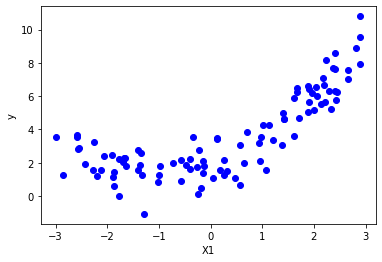

In [9]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.scatter(X, y, color='b')
plt.xlabel("X1")
plt.ylabel("y")
plt.show()

A straight line will never fit this data properly. So let’s use Scikit-Learn’s `PolynomialFeatures` class to transform our training data, adding the square ($2^{\text{nd}}$-degree polynomial) of each feature in the training set as new features (in this case there is just one feature):

**Note**: `PolynomialFeatures(degree=d)` generates a new feature matrix consisting of all polynomial combinations of the features with a degree less than or equal to the specified degree $d$. Specifically, it transforms an array containing $n$ features into an array containing $\frac{(n+d)!}{d!n!}$ 
features, where $n!$ is the [factorial](https://en.wikipedia.org/wiki/Factorial) of $n$. Beware of the combinatorial explosion of the number of features!

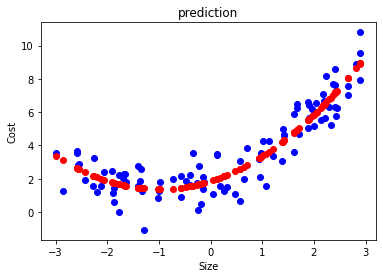

In [10]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
y_predict = lin_reg.predict(X_poly)

plt.scatter(X, y, color='b')
plt.scatter(X, y_predict, color= "r")

plt.xlabel("Size")
plt.ylabel("Cost")
plt.title("prediction")
plt.show()

`X_poly` contains the original feature of $X$ plus the square of this feature. Then we fit a `LinearRegression` model to this extended training data.


A high-degree Polynomial Regression model would be severely overfitting the training data, while a linear model would be underfitting it. The model that will generalize best is the quadratic model.

How can you decide how complex your model should be? If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then your model is overfitting. If it performs poorly on both, then it is underfitting.

Another way is to look at the learning curves: these are plots of the model’s performance on the training set and the validation set as a function of the training set size (or the training iteration). To generate the plots, simply train the model several times on different sized subsets of the training set.

## 4.4  Regularized linear models 

A good way to reduce overfitting is to regularize the model (i.e., to constrain it): the fewer degrees of freedom it has, the harder it will be for it to overfit the data. For example, a simple way to regularize a polynomial model is to reduce the number of polynomial degrees.

For a linear model, regularization is typically achieved by constraining the weights of the model. We will now look at Lasso Regression, Ridge Regression, and Elastic Net, which implement three different ways to constrain the weights.

### 4.4.1 Lasso 

Least Absolute Shrinkage and Selection Operator Regression (simply called *Lasso Regression*) is a linear model that estimates sparse coefficients. An important characteristic of Lasso Regression is that it tends to eliminate the weights of the least important features (i.e., set them to zero). In other words, Lasso Regression automatically performs feature selection and outputs a sparse model (i.e., with few nonzero feature weights).

Mathematically, it consists of a linear model with an added regularization term to the cost function. The objective function to minimize is:


$$J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta})+ \alpha \sum_{i=1}^{n}|\theta_i|$$


Note that the bias term $\theta_0$ is not regularized (the sum starts at $i = 1$, not 0). If we define $\boldsymbol{\omega}$ as the vector of feature weights ($\theta_1$ to $\theta_n$), then the regularization term is simply equal to $||\boldsymbol{\omega}||_{1}$, where $||\boldsymbol{\omega}||_{1}$ represents the $l_1$ norm of the weight vector.

The lasso estimate thus solves the minimization of the least-squares penalty with $\alpha||\boldsymbol{\omega}||_{1}$ added, where $\alpha$ is a constant. The parameter $\alpha$ controls the degree of sparsity of the estimated coefficients.

The Lasso cost function is not differentiable at $θ_i = 0$, but Gradient
Descent still works fine if you use a [subgradient vector](http://www.cs.cmu.edu/~ggordon/10725-F12/slides/08-general-gd.pdf) instead when any $θ_i = 0$.

It is important to scale the data (e.g., using a `StandardScaler`) before performing Lasso Regression, as it is sensitive to the scale of the input features. This is true of most regularized models.

The implementation in the class `Lasso` uses [coordinate descent](https://en.wikipedia.org/wiki/Coordinate_descent) as the algorithm to fit the coefficients. Note that you could instead use an `SGDRegressor(penalty="l1")`.

In [0]:
# We scale regresor variables(target variable has already scaled)
scaler_x = StandardScaler().fit(x_train)

# Model
model = Lasso(alpha=0.001)

# We train the model
fit_lasso = model.fit(scaler_x.transform(x_train), y_train)


In [13]:
# Coefficient of determination R^2
print('Explained variance in training set: %.3f' % fit_lasso.score(scaler_x.transform(x_train), y_train))
print('Explained variance in test set: %.3f' % fit_lasso.score(scaler_x.transform(x_test), y_test))

# Mean squared error
y_pred_train = fit_lasso.predict(scaler_x.transform(x_train))
y_pred_test = fit_lasso.predict(scaler_x.transform(x_test))

print("Mean squared error in training set: %.4f" % mean_squared_error(y_train, y_pred_train))
print("Mean squared error in test set: %.4f" % mean_squared_error(y_test, y_pred_test))

Explained variance in training set: 0.948
Explained variance in test set: 0.908
Mean squared error in training set: 0.0085
Mean squared error in test set: 0.0131


All linear models find a set of coefficients to use in the weighted sum in order to make a prediction. These coefficients can be used directly as a crude type of feature importance score (this assumes that the input variables have the same scale or have been scaled prior to fitting a model). We can visualize the importance of each feature in the model.

In [19]:
dict_importance_lasso = {'Features':list(x_train), 'Importance': abs(fit_lasso.coef_)}
df_importance_lasso = pd.DataFrame(dict_importance_lasso)
df_importance_lasso_sorted = df_importance_lasso.sort_values(by=['Importance'], ascending=False)
df_importance_lasso_sorted.head(10)

,Features,Importance
26,GrLivArea,0.135794
5,OverallQual,0.064329
7,YearBuilt,0.048287
6,OverallCond,0.037732
17,BsmtFinSF1,0.031994
21,TotalBsmtSF,0.029879
35,Functional,0.029364
187,CentralAir_N,0.020738
82,Neighborhood_Crawfor,0.020343
40,GarageCars,0.020112


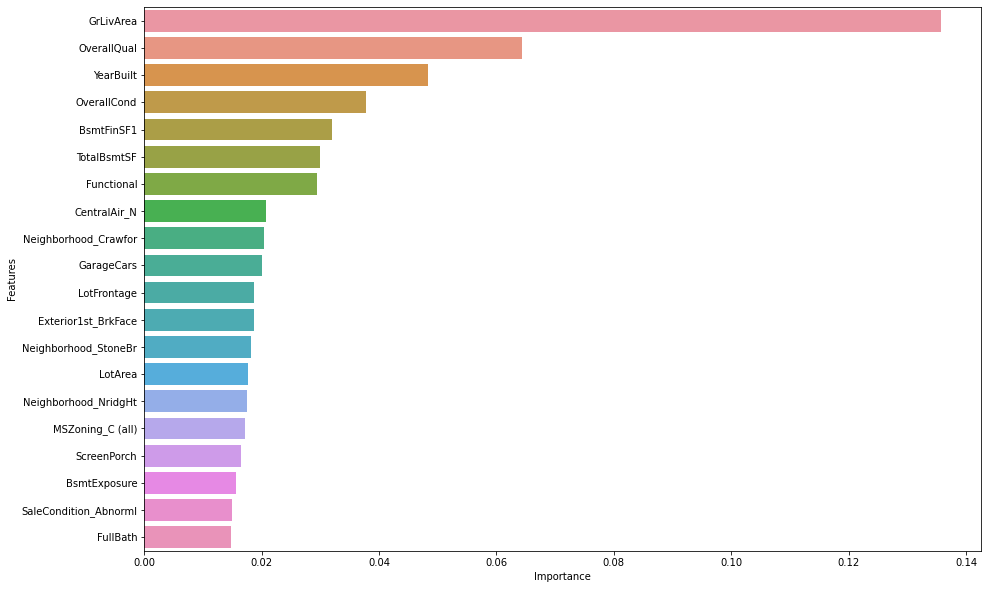

In [20]:
# plot importance of the features
plt.figure(figsize=(15, 10))
sns.barplot(data=df_importance_lasso_sorted.head(20), x='Importance', y = 'Features')

We show all the coefficients or weights of the model. Notice that only a few weights are nonzero.

In [0]:
print(fit_lasso.coef_)

`LassoCV` is used to estimate the parameter using cross-validation.
For high-dimensional datasets with many collinear features, `LassoCV` is most often preferable.



In [16]:
model_lassoCV = LassoCV( alphas=np.arange(0.001,0.5,0.001), cv=5, random_state=0, max_iter=10000)

# We train the model
fit_lassoCV = model_lassoCV.fit(x_train, y_train)

print(fit_lassoCV.alpha_)



0.001


### 4.4.2 Ridge 

*Ridge regression* addresses some of the problems of ordinary least squares by imposing a penalty on the size of the coefficients. A regularization term is added to the cost function. This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible.

The ridge coefficients minimize a penalized residual sum of squares:


$$ J(\boldsymbol{\theta})= \text{MSE}(\boldsymbol{\theta})+ \alpha \frac{1}{2} \sum_{i=1}^{n}\theta_i^2$$

Note that the bias term $\theta_0$ is not regularized (the sum starts at $i = 1$, not 0). If we define $\boldsymbol{\omega}$ as the vector of feature weights ($\theta_1$ to $\theta_n$), then the regularization term is simply equal to $\frac{1}{2}||\boldsymbol{\omega}||_{2}^{2}$, where $||\boldsymbol{\omega}||_{2}$ represents the $l_2$ norm of the weight vector.


The complexity hyperparameter $\alpha < 0$ controls how much you want to regularize the model: the larger the value of $\alpha$, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity. If $\alpha=0$ then Ridge Regression is just Linear Regression.



**Note**: As with Linear Regression, we can perform Ridge Regression either by computing a closed-form equation or by performing Gradient Descent (using `SGDRegressor` and selecting `penalty="l2"`). The pros and cons are the same. The next equation shows the closed-form solution (where $\boldsymbol{A}$ is the $(n + 1) × (n + 1)$ [identity matrix](https://en.wikipedia.org/wiki/Identity_matrix#:~:text=In%20linear%20algebra%2C%20the%20identity,trivially%20determined%20by%20the%20context.) except with a 0 in the top-left cell, corresponding to the bias term).

$$\boldsymbol{\hat{\theta}}=(\boldsymbol{X^T}\boldsymbol{X}+\alpha\boldsymbol{A})^{-1}\boldsymbol{X^T}\boldsymbol{y}$$

Here is how to perform Ridge Regression with Scikit-Learn using a closed-form solution (a variant of the previous equation using a matrix factorization technique by André-Louis Cholesky).

In [0]:
# We choose the model
model = Ridge(alpha=1, solver="cholesky")

# We train the model
fit_ridge = model.fit(scaler_x.transform(x_train), y_train)

In [18]:
# Coefficient of determination R^2
print('Explained variance in training set: %.3f' % fit_ridge.score(scaler_x.transform(x_train), y_train))
print('Explained variance in test set: %.3f' % fit_ridge.score(scaler_x.transform(x_test), y_test))

# Mean squared error
y_pred_train = fit_ridge.predict(scaler_x.transform(x_train))
y_pred_test = fit_ridge.predict(scaler_x.transform(x_test))

print("Mean squared error in training set: %.4f" % mean_squared_error(y_train, y_pred_train))
print("Mean squared error in test set: %.4f" % mean_squared_error(y_test, y_pred_test))

Explained variance in training set: 0.950
Explained variance in test set: 0.899
Mean squared error in training set: 0.0082
Mean squared error in test set: 0.0144


We can use `RidgeCV` that implements ridge regression with built-in cross-validation of the `alpha` parameter similarly to `LassoCV`.

### 4.4.3 ElasticNet


ElasticNet is a linear regression model trained with both $l_{1}$ and $l_{2}$-norm regularization of the coefficients. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. We control the convex combination of $l_{1}$ and $l_{2}$ using the $r$ parameter. When $r=0$, Elastic Net is equivalent to Ridge Regression, and when $r=1$, it is equivalent to Lasso Regression

Elastic-net is useful when multiple features are correlated with one another. Lasso is likely to pick one of these at random, while elasticnet is likely to pick both.

The objective function to minimize in this case is:


$$J(\boldsymbol{\theta})=\text{MSE}(\boldsymbol{\theta}) + \alpha r\sum_{i=1}^{n}|\theta_i|+\frac{\alpha(1-r)}{2}\sum_{i=1}^{n}\theta_i^2$$

In [0]:
# We choose the model
model = ElasticNet(alpha=0.0098, l1_ratio=0.4)

# We train the model
fit_elasticnet = model.fit(scaler_x.transform(x_train), y_train)


In [22]:
# Coefficient of determination R^2
print('Explained variance in training set: %.3f' % fit_elasticnet.score(scaler_x.transform(x_train), y_train))
print('Explained variance in test set: %.3f' % fit_elasticnet.score(scaler_x.transform(x_test), y_test))

# Mean squared error
y_pred_train = fit_elasticnet.predict(scaler_x.transform(x_train))
y_pred_test = fit_elasticnet.predict(scaler_x.transform(x_test))
print("Mean squared error train: %.4f" % mean_squared_error(y_train, y_pred_train))
print("Mean squared error test: %.4f" % mean_squared_error(y_test, y_pred_test))

Explained variance in training set: 0.940
Explained variance in test set: 0.910
Mean squared error train: 0.0099
Mean squared error test: 0.0128


We can visualize the importance of each feature in the model

In [24]:
dict_importance_elasticnet = {'Features':list(x_train), 'Importance': abs(fit_elasticnet.coef_)}
df_importance_elasticnet = pd.DataFrame(dict_importance_elasticnet)
df_importance_elasticnet_sorted = df_importance_elasticnet.sort_values(by=['Importance'], ascending=False)
df_importance_elasticnet_sorted.head(10)

,Features,Importance
26,GrLivArea,0.132679
5,OverallQual,0.076425
7,YearBuilt,0.039394
21,TotalBsmtSF,0.036071
6,OverallCond,0.032791
17,BsmtFinSF1,0.031376
35,Functional,0.025974
40,GarageCars,0.024596
58,MSZoning_RM,0.018801
33,KitchenQual,0.016383


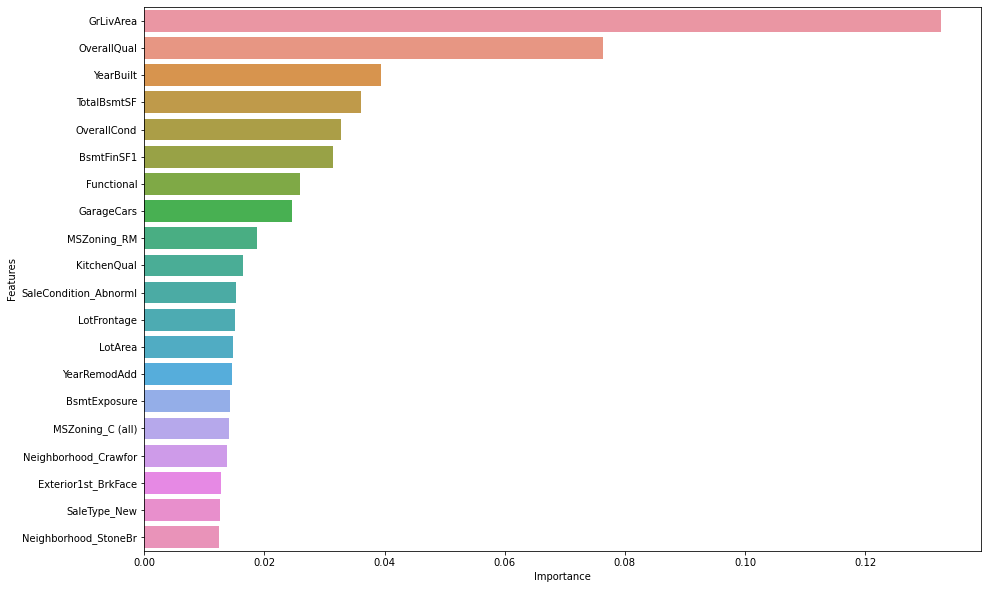

In [25]:
# plot importance of the features
plt.figure(figsize=(15, 10))
sns.barplot(data=df_importance_elasticnet_sorted.head(20), x='Importance', y = 'Features')

The class `ElasticNetCV` can be used to set the parameters `alpha` ($\alpha$) and `l1_ratio` ($r$) by cross-validation.

In [26]:
model_elasticNetCV = ElasticNetCV(alphas=np.arange(0.0001,0.01,0.0001),
                                  l1_ratio=np.arange(0.1,1,0.1), cv=5)

# We train the model
fit_elasticNetCV = model_elasticNetCV.fit(scaler_x.transform(x_train), y_train)

print(fit_elasticNetCV.alpha_)
print(fit_elasticNetCV.l1_ratio_)


0.0098
0.4


So when should you use plain Linear Regression (i.e., without any regularization), Ridge, Lasso, or Elastic Net? It is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression. Ridge is a good default, but if you suspect that only a few features are useful, you should prefer Lasso or Elastic Net since they tend to reduce the useless features weights down to zero as we have discussed. In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

## 4.5 Robustness regression


### Huber Regression

The *HuberRegressor* applies a linear loss to samples that are classified as [outliers](https://en.wikipedia.org/wiki/Outlier). A sample is classified as an outlier if the absolute error of that sample is lesser than a certain threshold. It does not ignore the effect of the outliers but gives a lesser weight to them.

The loss function that HuberRegressor minimizes is given by

$$J(\boldsymbol{\theta})= \sum_{i=1}^{m}(\sigma+H_{\epsilon}(\frac{\boldsymbol{\theta}^T\boldsymbol{x}^{(i)} - y^{(i)}}{\sigma})\sigma)+\alpha||\boldsymbol{\theta}||_{2}^{2}$$

where

$$H_{\epsilon}(z)=\begin{cases}
       z^{2} ,&\quad\text{if}|z|\le\epsilon\\
       2\epsilon|z|-\epsilon^{2} ,&\quad\text{otherwhise}\\
     \end{cases}$$

In [0]:
model = HuberRegressor(alpha=0.006,epsilon=3.6,max_iter=1000)

# We train the model
fit_huber = model.fit(scaler_x.transform(x_train), y_train)

In [28]:
# Coefficient of determination R^2
print('Explained variance in training: %.3f' % fit_huber.score(scaler_x.transform(x_train), y_train))
print('Explained variance in test set: %.3f' % fit_huber.score(scaler_x.transform(x_test), y_test))

# Mean squared error
y_pred_train = fit_huber.predict(scaler_x.transform(x_train))
y_pred_test = fit_huber.predict(scaler_x.transform(x_test))
print("Mean squared error in training set: %.4f" % mean_squared_error(y_train, y_pred_train))
print("Mean squared error in test set: %.4f" % mean_squared_error(y_test, y_pred_test))



Explained variance in training: 0.950
Explained variance in test set: 0.899
Mean squared error in training set: 0.0082
Mean squared error in test set: 0.0143


We can tune some hyperparameters of the model.

In [29]:

# We choose the model
model_huber = HuberRegressor()

# We input possible values of parameters
param_grid = {
    'epsilon': np.arange(0.5,5,0.1),
    'alpha': np.arange(0.001,0.01,0.005),
}
clf = GridSearchCV(model_huber, param_grid, cv=5, n_jobs=5)

# We train the model for diferent values of parameters
clf.fit(scaler_x.transform(x_train), y_train)

clf.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


{'alpha': 0.006, 'epsilon': 3.599999999999999}

## 4.6 Stochastic Gradient Descent - SGD


SGD stands for Stochastic Gradient Descent: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate). More info about gradient descent algorithm [here](https://github.com/victorviro/ML_algorithms_python/blob/master/Introduction_gradient_descent_algorithm.ipynb).

The regularizer is a penalty added to the loss function that shrinks model parameters towards the zero vector using either the squared euclidean norm $l_2$ or the absolute norm $l_1$ or a combination of both (Elastic Net).

Stochastic gradient descent is a simple yet very efficient approach to fit linear models. It is particularly useful when the number of samples (and the number of features) is very large.

The classes `SGDRegressor` provides functionality to fit linear models for regression using different (convex) loss functions and different penalties.


In [34]:
model_SGD = SGDRegressor()

# We input possible values of parameters
param_grid = {
    'alpha': np.arange(0.0005,0.0100,0.001),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}

grid_SGD = GridSearchCV(model_SGD, param_grid, cv=5, n_jobs=5)

# We train the model
fit_SGD = grid_SGD.fit(scaler_x.transform(x_train), y_train)
print(fit_SGD.best_params_)

{'alpha': 0.0085, 'learning_rate': 'optimal', 'loss': 'huber', 'penalty': 'elasticnet'}


In [35]:
# Coefficient of determination R^2
print('Explained variance in training set: %.3f' % fit_SGD.score(scaler_x.transform(x_train), y_train))
print('Explained variance in test set: %.3f' % fit_SGD.score(scaler_x.transform(x_test), y_test))

# Mean squared error
y_pred_train = fit_SGD.predict(scaler_x.transform(x_train))
y_pred_test = fit_SGD.predict(scaler_x.transform(x_test))
print("Mean squared error in training set: %.4f" % mean_squared_error(y_train, y_pred_train))
print("Mean squared error in test set: %.4f" % mean_squared_error(y_test, y_pred_test))


Explained variance in training set: 0.913
Explained variance in test set: 0.885
Mean squared error in training set: 0.0142
Mean squared error in test set: 0.0163


A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called *early stopping*. We can implement this setting the parameter `warm_start=True` when we define the `SGDRegressor` model.

**Note** With Stochastic and Mini-batch Gradient Descent, the curves are not so smooth, and it may be hard to know whether you have reached the minimum or not. One solution is to stop only after the validation error has been above the minimum for some time (when you are confident that the model will not do any better).

## 4.7 Logistic regression

We have seen how we can make predictions using linear regression. In this section, we will dive deep into the generalized model of linear regression for classification instead of prediction. *Logistic regression* (also called *logit regression*) is a linear classifier. It calculates the probability of two classes between 0 and 1. We can simply classify an item if it’s probability score is less than 0.5 is classified in class 0 (negative class) otherwise in class 1 (positive class).

#### 4.7.1 Estimating probabilities

Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result.

$$\hat{p}=h_{\boldsymbol{\theta}}(\boldsymbol{x})=\sigma(\boldsymbol{\theta^T}\boldsymbol{x})=\frac{1}{1+e^{-\boldsymbol{\theta^T}\boldsymbol{x}}}$$

- $\sigma(.)$ is the logistic function (also called *sigmoid*) that outputs a number between 0 and 1.
- $\hat{p}$ is the probability estimated that the target variable $Y$ is equal to 1 given the input features $\boldsymbol{x}$, this is, the estimation of $P(Y=1|X=\boldsymbol{x})$

The linear regression model is not good for binary classification because we want $\hat{p} \in (0,1)$ and $\boldsymbol{\theta^T}\boldsymbol{x}$ can be much bigger or can even be negative which does not sense for probability. Applying the sigmoid function we get values between 0 and 1.


![texto alternativo](https://i.ibb.co/QX4tRCc/logistic-function.png)

Notice that if $t$ is large, then $\sigma(t) \approx \frac{1}{1+0}=1$, and conversely, if $t$ is small, then $\sigma(t) \approx \frac{1}{1+\infty}=0$ (see figure 4-21).



Once the Logistic Regression model has estimated the probability $\hat{p}$ that an instance $\boldsymbol{x}$ belongs to the positive class, it can make its prediction $\hat{y}$ easily.

$$
   \hat{y}  = \begin{cases}
               0 & \text{if } \hat{p} < 0.5\\
               1 & \text{if } \hat{p} \geq 0.5
          \end{cases}
$$

**Note**: The *Odds* are defined as the probability that the event will occur divided by the probability that the event will not occur. If the probability of success is $P$, then the odds of that event is: $\text{odds} = \frac{P}{1-P}$. We can use a linear regression model to predict the log of the odds (*logit* function), this is, $\text{logit}(P)=ln(\frac{P}{1-P}) = \boldsymbol{\theta^T}\boldsymbol{x} \implies \frac{P}{1-P} = e^{\boldsymbol{\theta^T}\boldsymbol{x}} \implies P = \frac{e^{\boldsymbol{\theta^T}\boldsymbol{x}}}{1+e^{\boldsymbol{\theta^T}\boldsymbol{x}}}=\frac{1}{1+e^{-\boldsymbol{\theta^T}\boldsymbol{x}}} = \sigma(\boldsymbol{\theta^T}\boldsymbol{x})$





#### 4.7.2 Training and cost function

The objective of the training process is to set the parameter vector $\boldsymbol{\theta}$ so that the model estimates high probabilities for positive instances ($y =
1$) and low probabilities for negative instances ($y = 0$).

Linear regression uses the MSE as loss function that gives a convex graph and then we can complete the optimization by finding its global minimum. However, it’s not an option for logistic regression since the hypothesis is changed, the MSE will result in a non-convex graph with local minimums so gradient descent may not find a global optimum.

![texto alternativo](https://i.ibb.co/qJq6h4L/local-minima.png)

Instead of MSE, we use a cost function for a single training instance $\boldsymbol{x}$ (logistic loss):

$$
   c(h_{\boldsymbol{\theta}}(\boldsymbol{x}),y)  = \begin{cases}
               -log(\hat{p}) & \text{if } y = 1\\
               -log(1-\hat{p}) & \text{if } y=0
          \end{cases}
$$

This cost function makes sense because $–log(t)$ grows very large when $t$ approaches 0, so the cost will be large if the model estimates a probability close to 0 for a positive instance, and it will also be very large if the model estimates a probability close to 1 for a negative instance. On the other hand, $– log(t)$ is close to 0 when t is close to 1, so the cost will be close to 0 if the estimated probability is close to 0 for a negative
instance or close to 1 for a positive instance, which is precisely what we want.

Another advantage of this loss function is that although we are looking at it by $y = 1$ and $y = 0$ separately, it can be written as one single formula which brings convenience for calculation:

$$c(h_{\boldsymbol{\theta}}(\boldsymbol{x}),y)=-ylog(\hat{p})+(1-y)log(1-\hat{p})$$

The cost function over the whole training set is simply the average cost over all training instances. It can be written in a single expression called
the *log loss*:

$$J(\boldsymbol{\theta})=\frac{1}{m}\sum_{i=1}^{m}c(h_{\boldsymbol{\theta}}(\boldsymbol{x}^{(i)}),y^{(i)})= -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}log(\hat{p}^{(i)})+(1-y^{(i)})log(1-\hat{p}^{(i)})$$

There is no analytical solution to compute the value of $\boldsymbol{\theta}$ that minimizes this cost function (there is no equivalent of the Normal Equation). But this cost function is convex, so Gradient Descent (or any other optimization algorithm such as [Newton–Raphson method](https://en.wikipedia.org/wiki/Newton%27s_method)) is guaranteed to find the global minimum (if the learning rate is not too large and you wait long enough if we use Gradient Descent). The partial derivatives of the cost
function with regards to the parameter $\theta_j$, $\frac{∂J(\boldsymbol{\theta})}{∂\theta_j}$, can be easily calculated. Once you have the gradient vector containing all the partial derivatives you can use it in the Batch Gradient Descent algorithm.



**Note**: In statistics, *maximum likelihood estimation* ([MLE](https://en.wikipediaorgwikiMaximum_likelihood_estimation#:~:text=In%20statistics%2C%20maximum%20likelihood%20estimation,observed%20data%20is%20most%20probable.)) is widely used to obtain the parameter for a distribution. To use maximum likelihood, we need to assume a probability distribution. In the case of logistic regression, a Binomial probability distribution is assumed for the data sample, where each example is one outcome of a Bernoulli trial. In this context, calculating the negative of the log-likelihood function for the Bernoulli distribution is equivalent to calculating the log loss function for the Bernoulli distribution.

#### 4.7.3 Example

Let’s use the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) to illustrate Logistic Regression. This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica.

Let’s try to build a classifier to detect the Iris-Virginica type based only on the petal width feature. First, let’s load the data:

In [36]:
from sklearn import datasets

iris = datasets.load_iris()
print(list(iris.keys()))
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int)

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']


Now let’s train a Logistic Regression model:

In [37]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Let’s look at the model’s estimated probabilities for flowers with petal widths varying from 0 to 3 cm.

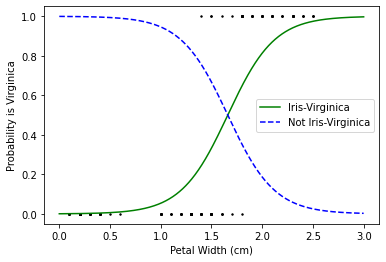

In [38]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.scatter(X, y, c='black', s=2)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

plt.xlabel("Petal Width (cm)")
plt.ylabel("Probability is Virginica")
plt.legend()
plt.show()

The petal width of Iris-Virginica flowers ranges from 1.4 cm to 2.5 cm, while the other iris flowers (not Iris-Virginica) generally have a smaller petal width, ranging from 0.1 cm to 1.8 cm. Notice that there is a bit of overlap. Above about 2 cm the classifier is highly confident that the flower is an Iris-Virginica (it outputs a high probability to that class), while below 1 cm it is highly confident that it is not an Iris-Virginica (high probability for the “Not Iris-Virginica” class). In between these extremes, the classifier is unsure. However, if you ask it to predict the class (using the `predict()` method rather than the `predict_proba()` method), it will return whichever class is the most likely. Therefore, there is a decision boundary at around 1.6 cm where both probabilities are equal to 50%: if the petal width is higher than 1.6 cm, the classifier will predict that the flower is an Iris-Virginica, or else it will predict that it is not (even if it is not very confident):



In [39]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

Figure 4-24 shows the same dataset but this time displaying two features: petal width and length. Once trained, the Logistic Regression classifier can estimate the probability that a new flower is an Iris-Virginica based on these two features. 

![alt text](https://i.ibb.co/r06mngv/decision-boundary-logistic-regression-png.png)


The dashed line represents the points where the model estimates a 50% probability: this is the model’s decision boundary. Note that it is a linear boundary. Each parallel line represents the points where the model outputs a specific probability, from 15% (bottom left) to 90% (top right). All the flowers beyond the top-right line have an over 90% chance of being Iris-Virginica according to the model.

Just like the other linear models, Logistic Regression models can be regularized using $l_1$ or $l_2$ penalties. Scitkit-Learn actually adds an $l_2$ penalty by default. The hyperparameter controlling the regularization strength of a Scikit-Learn `LogisticRegression` model is not alpha (as in other
linear models), but its inverse: `C` . The higher the value of `C`, the less
the model is regularized.



#### 4.7.4 Multinomial logistic regression



The Logistic Regression model can be generalized to support multiple classes directly. This is called *Softmax Regression*, or *Multinomial Logistic Regression*.

The idea is quite simple: when given an instance $\boldsymbol{x}$, the Softmax Regression model first computes a score $s_{k}(\boldsymbol{x})$ for each class $k$, then estimates the probability of each class by applying the *softmax function* (also called the *normalized exponential*) to the scores. The equation to compute $s_{k}(\boldsymbol{x})$ is just like the equation for Linear Regression prediction.

$$s_{k}(\boldsymbol{x})=\boldsymbol{x}^T\boldsymbol{\theta}^{(k)}$$

Each class has its own dedicated parameter vector $\boldsymbol{\theta}^{(k)}$ . All these vectors are usually stored as rows in a parameter matrix $\boldsymbol{\Theta}$.

Once you have computed the score of every class for the instance $\boldsymbol{x}$, you can estimate the probability $\hat{p}_k$ that the instance belongs to class $k$ by running the scores through the softmax function:

$$\hat{p}_k=\sigma(\boldsymbol{s}(\boldsymbol{x}))_{k}=\frac{e^{s_{k}(\boldsymbol{x})}}{\sum_{j=1}^{K}e^{s_{j}(\boldsymbol{x})}}$$

The softmax function computes the exponential of every score, then normalizes them (dividing by the sum of all the exponentials). The scores are generally called logits or log-odds (although they are actually unnormalized log-odds).

- $K$ is the number of classes.
- $\boldsymbol{s}(\boldsymbol{x})$ is a vector containing the scores of each class for the instance $\boldsymbol{x}$.

- $\sigma(\boldsymbol{s}(\boldsymbol{x}))_{k}$ is the estimated probability that the instance $\boldsymbol{x}$ belongs to class $k$ given the scores of each class for that instance.


Just like the Logistic Regression classifier, the Softmax Regression classifier predicts the class with the highest estimated probability (which is simply the class with the highest score).

$$\hat{y}=\text{arg}\max\limits_{k}\sigma(\boldsymbol{s}(\boldsymbol{x}))_{k}=\text{arg}\max\limits_{k}s_{k}(\boldsymbol{x})=\text{arg}\max\limits_{k}((\boldsymbol{\theta}^{(k)})^T \boldsymbol{x})$$

- The *argmax* operator returns the value of a variable that maximizes a function. In this equation, it returns the value of $k$ that maximizes the estimated probability $\sigma(\boldsymbol{s}(\boldsymbol{x}))_{k}$.

**Note**: The Softmax Regression classifier predicts only one class at a time
(i.e., it is multiclass, not multioutput) so it should be used only with
mutually exclusive classes such as different types of plants. You cannot use it to recognize multiple objects in one picture.

Let’s take a look at training. The objective is to have a model that estimates a high probability for the target class (and consequently a low probability for the other classes). Minimizing the cost function called the *cross-entropy*, should lead to this objective because it penalizes the model when it estimates
a low probability for a target class. 

$$J(\boldsymbol{\Theta})= -\frac{1}{m}\sum_{i=1}^{m} \sum_{k=1}^{K} y^{(i)}_klog(\hat{p}_k^{(i)})$$

- $y^{(i)}_k$ is the target probability that the $i^{\text{th}}$ instance belongs to class $k$. In general, it is either equal to 1 or 0, depending on whether the instance belongs to the class or not.

Cross entropy is frequently used to measure how well a set of estimated class probabilities match the target classes.

Notice that when there are just two classes ($K = 2$), this cost function is equivalent to the Logistic Regression’s cost function (log loss).

**Note**: Cross entropy originated from information theory. Suppose you want to efficiently transmit information about the weather every day. If there are eight options (sunny, rainy, etc.), you could encode each option using 3 bits since $2^3 = 8$. However, if you think it will be sunny almost every day, it would be much more efficient to code “sunny” on just one bit (0) and the other seven options on 4 bits (starting with a 1). Cross entropy measures the average number of bits you actually send per option. If your assumption about the weather is perfect, cross-entropy will just be equal to the entropy of the weather itself (i.e., its intrinsic unpredictability). But if your assumptions are wrong (e.g., if it rains often), cross-entropy will be greater by an amount called the [K–L divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence). The cross-entropy between two probability distributions $p$ and $q$ is defined as $H(p,q)=-\sum_{x}p(x)log(q(x))$ (at least when the distributions are discrete). For more details, check out this [video](https://www.youtube.com/watch?v=ErfnhcEV1O8).

The gradient vector of this cost function with regards to $\boldsymbol{\theta}^{(k)}$, $\nabla_{\boldsymbol{\theta}^{(k)}}J(\boldsymbol{\Theta})$, can be easily calculated. We can compute the gradient vector for every class, then use Gradient Descent (or any other optimization algorithm) to find the parameter matrix $\boldsymbol{\Theta}$ that minimizes the cost function.




Let’s use Softmax Regression to classify the iris flowers into all three classes. Scikit-Learn’s `LogisticRegression` uses one-versus-all by default when you train it on more than two classes, but you can set the `multi_class` hyperparameter to `"multinomial"` to switch it to Softmax Regression instead. You must also specify a solver that supports Softmax Regression, such as the `"lbfgs"` solver (see Scikit-Learn’s documentation for more details). It also applies $l_2$ regularization by default, which you can control using the hyperparameter `C`.

In [40]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

If we find an iris with 5 cm long and 2 cm wide petals, we can ask
our model to tell you what type of iris it is

In [41]:
print(softmax_reg.predict([[5, 2]]))
print(softmax_reg.predict_proba([[5, 2]]))

[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]


The model answers Iris-Virginica (class 2) with 94.2% probability (or Iris-Versicolor with 5.8% probability).

Figure 4-25 shows the resulting decision boundaries, represented by the background colors.

![texto alternativo](https://i.ibb.co/k8SjSB7/softmax-regression-boundaries.png)

Notice that the decision boundaries between any two classes are linear. The
figure also shows the probabilities for the Iris-Versicolor class, represented by the curved lines (e.g., the line labeled with 0.450 represents the 45% probability boundary). Notice that the model can predict a class that has an estimated probability below 50%. For example, at the point where all decision boundaries meet, all classes have an equal estimated probability of 33%.